#Ridge Regression


Ridge regression is a regularized version of linear regression. This forces the training algorithm not only to fit the data but also to keep the model weights as small as possible.

#**Lasso Regression**

Least absolute shrinkage and selection operator regression (usually just called lasso regression) is another regularized version of linear regression: just like peak regression, it adds a regularization term to the cost function.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
data = pd.read_csv("advertising.csv")
print(data.head())

      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9


In [35]:
def scatter_plot(feature, target):
    plt.figure(figsize=(16, 18))
    plt.scatter(data[feature],
                data[target],
                c='black'
                )
    plt.xlabel("Money Spent on {} ads ($)".format(feature))
    plt.ylabel("Sales ($k)")
    plt.show()

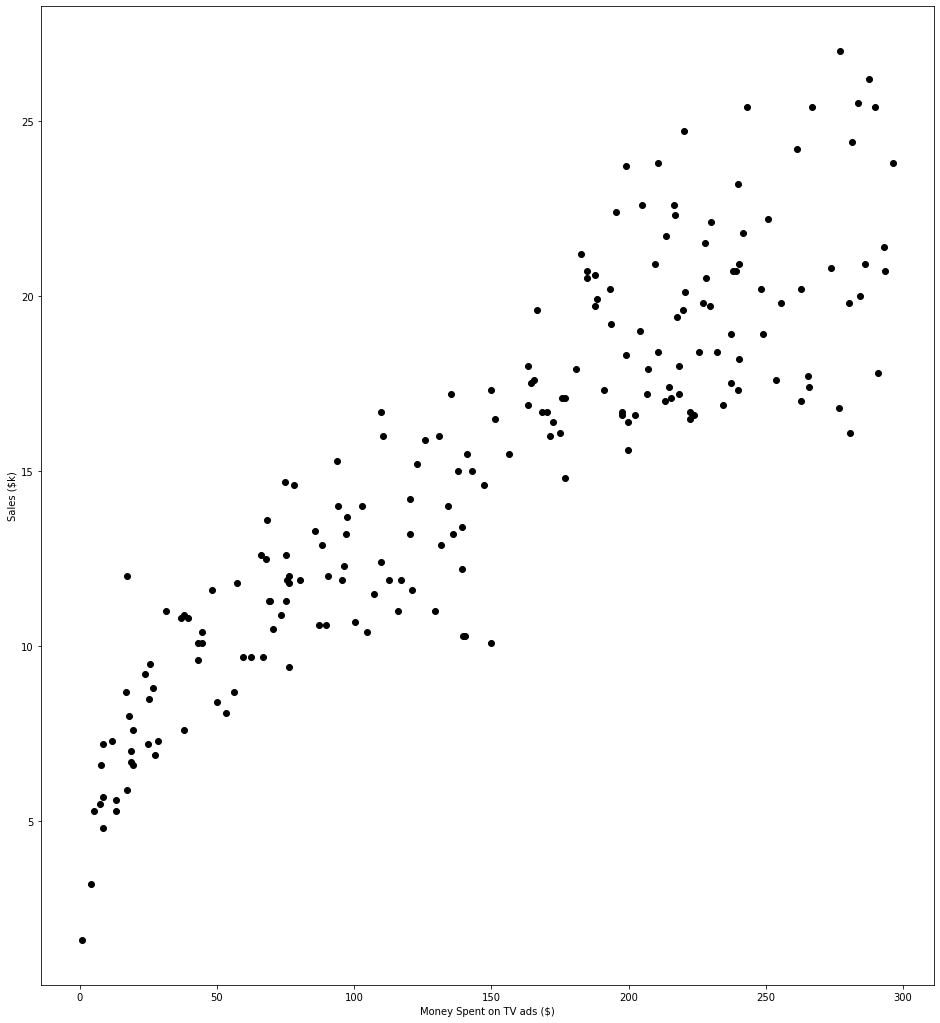

In [36]:
scatter_plot("TV", "Sales")

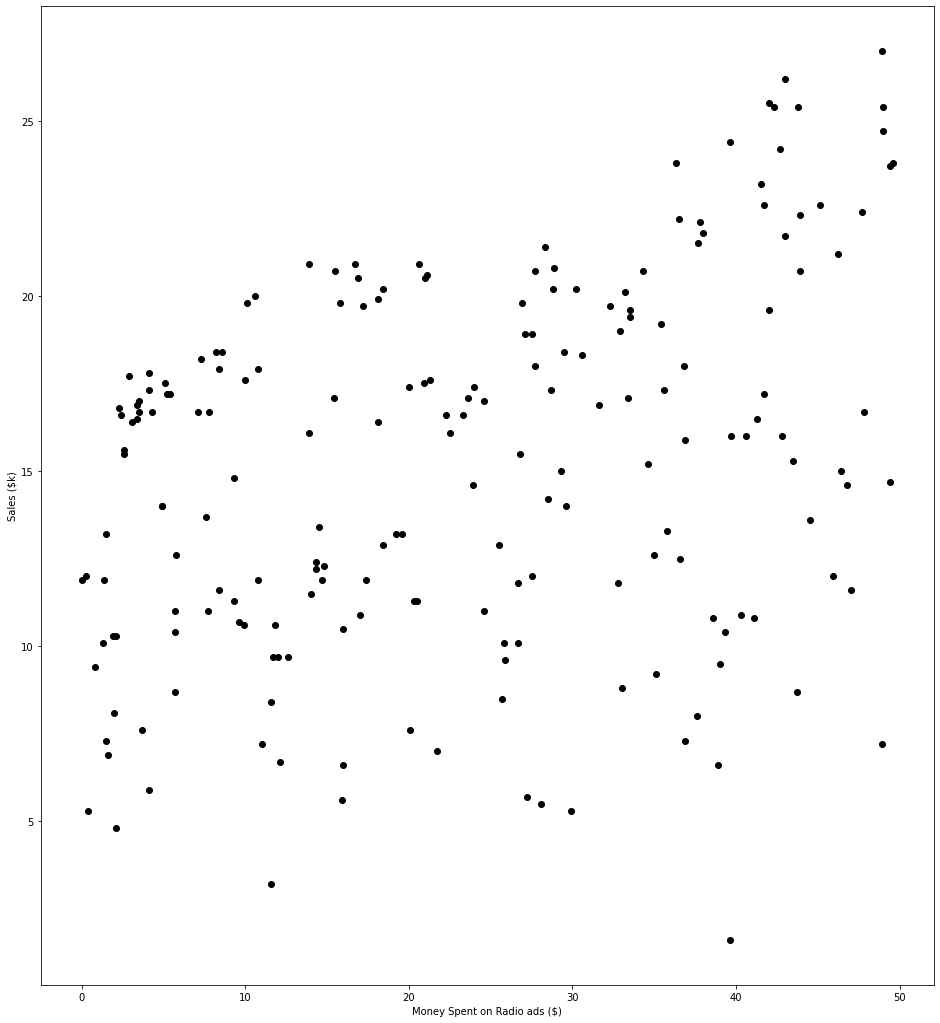

In [37]:
scatter_plot("Radio", "Sales")

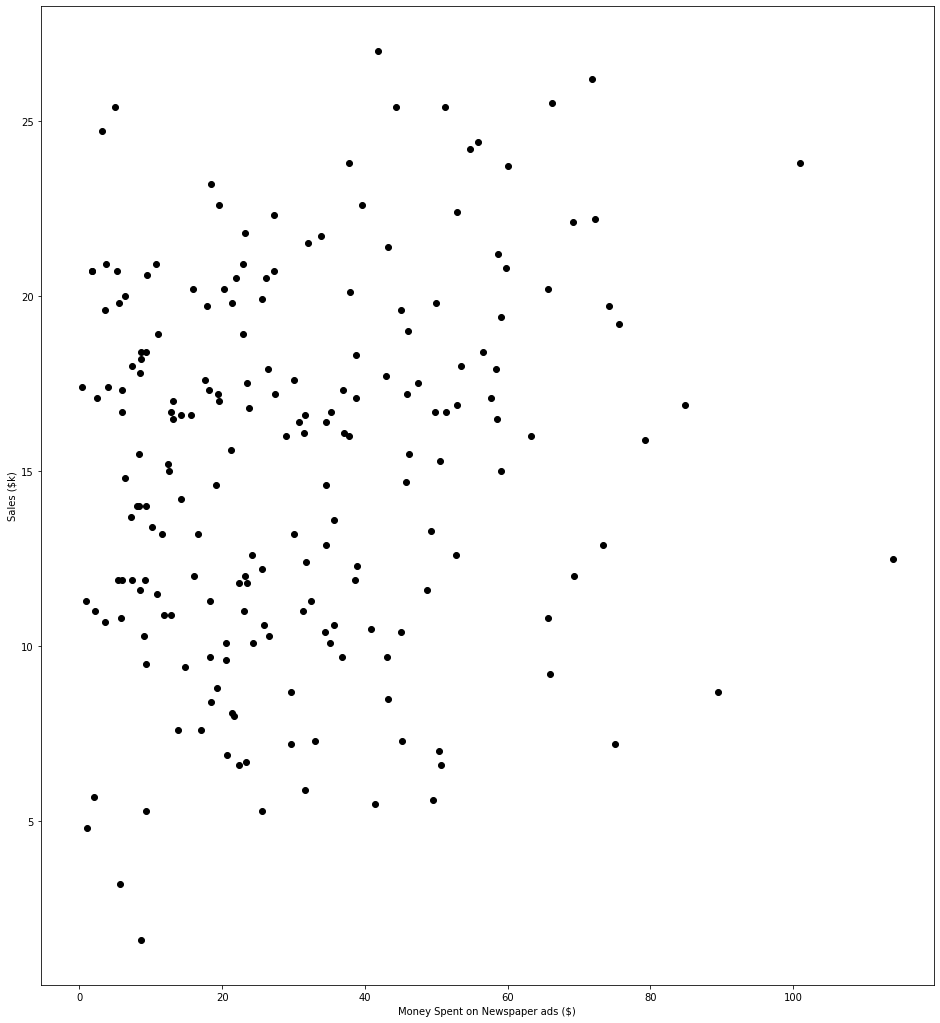

In [38]:
scatter_plot("Newspaper", "Sales")

#Multiple Linear Regression Algorithm

As Ridge and Lasso Regression models are a way of regularizing the linear models so we first need to prepare a linear model. 

In [39]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

xs = data.drop(["Sales"], axis=1)
y = data["Sales"].values.reshape(-1,1)
linreg = LinearRegression()
MSE = cross_val_score(linreg, xs, y, scoring="neg_mean_squared_error", cv=5)

mean_MSE = np.mean(MSE)
print(mean_MSE)

-2.858243009991009


Ridge Regression

For the ridge regression algorithm, we will use GridSearchCV model provided by Scikit-learn, which will allow us to automatically perform the 5-fold cross-validation to find the optimal value of alpha.

In [40]:
# Ridge Regression
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()


ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_regression.fit(xs, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [41]:
print(ridge_regression.best_params_)
print(ridge_regression.best_score_)

{'alpha': 20}
-2.858183819191847


In [42]:
from sklearn.linear_model import Lasso
lasso = Lasso()


lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regression.fit(xs, y)

print(lasso_regression.best_params_)
print(lasso_regression.best_score_)

{'alpha': 1}
-2.851375129372136


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 190.00022905633278, tolerance: 0.458666
  positive)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 196.83747773139828, tolerance: 0.44512240000000003
  positive)
